## Librerías

In [17]:
import numpy as np
import pandas as pd
import math

#Para implementación y evalución del árbol de decisión (modelo de clasificación)
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #Exportar
from pydotplus import graph_from_dot_data #Crear grafico
from sklearn.tree import export_text
from sklearn.metrics import confusion_matrix

#Para implementación y evaluación del modelo madaline (modelo de predicción)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

## Base de Datos

Este conjunto de datos (tomado de: https://www.kaggle.com/datasets/sintariosatya/heart-disease-dataset?resource=download) contiene registros médicos de pacientes, con el objetivo principal de predecir la presencia de una enfermedad cardíaca en función de diversas características clínicas y demográficas.

*   Número de registros: 1024 pacientes
*   Número de variables: 14

**Objetivo del análisis:**

Clasificar si un paciente tiene o no enfermedad cardíaca (`target`)

Predecir una variable numérica continua como la depresión del ST inducida por el ejercicio (`oldpeak`)

### Descripción de las variables

| Variable   | Tipo       | Descripción                                                                         | Rol potencial              |
| ---------- | ---------- | ----------------------------------------------------------------------------------- | -------------------------- |
| `age`      | Numérica   | Edad del paciente (en años)                                                         | Variable explicativa       |
| `sex`      | Categórica | Sexo del paciente (1 = hombre, 0 = mujer)                                           | Agrupamiento               |
| `cp`       | Categórica | Tipo de dolor torácico (0 a 3: angina típica, atípica, no anginosa, asintomática)   | Clasificación/Agrupamiento |
| `trestbps` | Numérica   | Presión arterial en reposo (mm Hg)                                                  | Variable explicativa       |
| `chol`     | Numérica   | Nivel de colesterol en sangre (mg/dl)                                               | Variable explicativa       |
| `fbs`      | Categórica | Glucemia en ayunas (>120 mg/dl, 1 = sí, 0 = no)                                     | Clasificación              |
| `restecg`  | Categórica | Resultados del electrocardiograma en reposo (0, 1, 2)                               | Agrupamiento               |
| `thalach`  | Numérica   | **Máxima frecuencia cardíaca alcanzada**                                            | Pronóstico Alternativo             |
| `exang`    | Categórica | Angina inducida por ejercicio (1 = sí, 0 = no)                                      | Clasificación              |
| `oldpeak`  | Numérica   | Depresión del ST inducida por el ejercicio (medida en relación con el reposo)       | **Pronóstico**     |
| `slope`    | Categórica | Pendiente del segmento ST en el ECG (0, 1, 2)                                       | Agrupamiento               |
| `ca`       | Categórica | Número de vasos principales coloreados por fluoroscopía (0 a 3)                     | Clasificación              |
| `thal`     | Categórica | Estado funcional del corazón (1 = normal, 2 = defecto fijo, 3 = defecto reversible) | Clasificación/Agrupamiento |
| `target`   | Categórica | **Diagnóstico de enfermedad cardíaca (1 = sí, 0 = no)**                             | **Clasificación**          |


### Variables objetivo (Propuestas)

| Tipo de análisis  | Variable objetivo                      | Justificación                                                                                                         |
| ----------------- | -------------------------------------- | --------------------------------------------------------------------------------------------------------------------- |
| **Clasificación** | `target`                               | Permite predecir si el paciente presenta o no enfermedad cardíaca (tarea médica fundamental).                         |
| **Pronóstico**    | `oldpeak`                              | Permite estimar la depresión del ST inducida por el ejercicio (medida en relación con el reposo). |
| **Agrupamiento**  | `cp`, `thal`, `restecg`, `slope`, `ca` | Permiten identificar patrones o perfiles de pacientes con características similares.                                  |


## Carga y Visualización de los Datos


Estadísticas descriptivas:
                age          sex           cp     trestbps         chol  \
count  1024.000000  1024.000000  1024.000000  1024.000000  1024.000000   
mean     54.532202     0.685547     3.149414   131.478621   246.965108   
std       9.273400     0.464525     0.971812    17.506230    52.561237   
min      18.000000     0.000000     1.000000    84.869643   100.000000   
25%      48.193472     0.000000     3.000000   120.000000   211.000000   
50%      55.000000     1.000000     3.000000   130.012111   244.996816   
75%      61.196437     1.000000     4.000000   142.412148   280.232245   
max      78.795030     1.000000     4.000000   200.000000   564.000000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1024.000000  1024.000000  1024.000000  1024.000000  1024.000000   
mean      0.165039     1.001953   149.638107     0.345703     1.090142   
std       0.371397     0.993624    23.480260     0.475829     1.072306   
min     

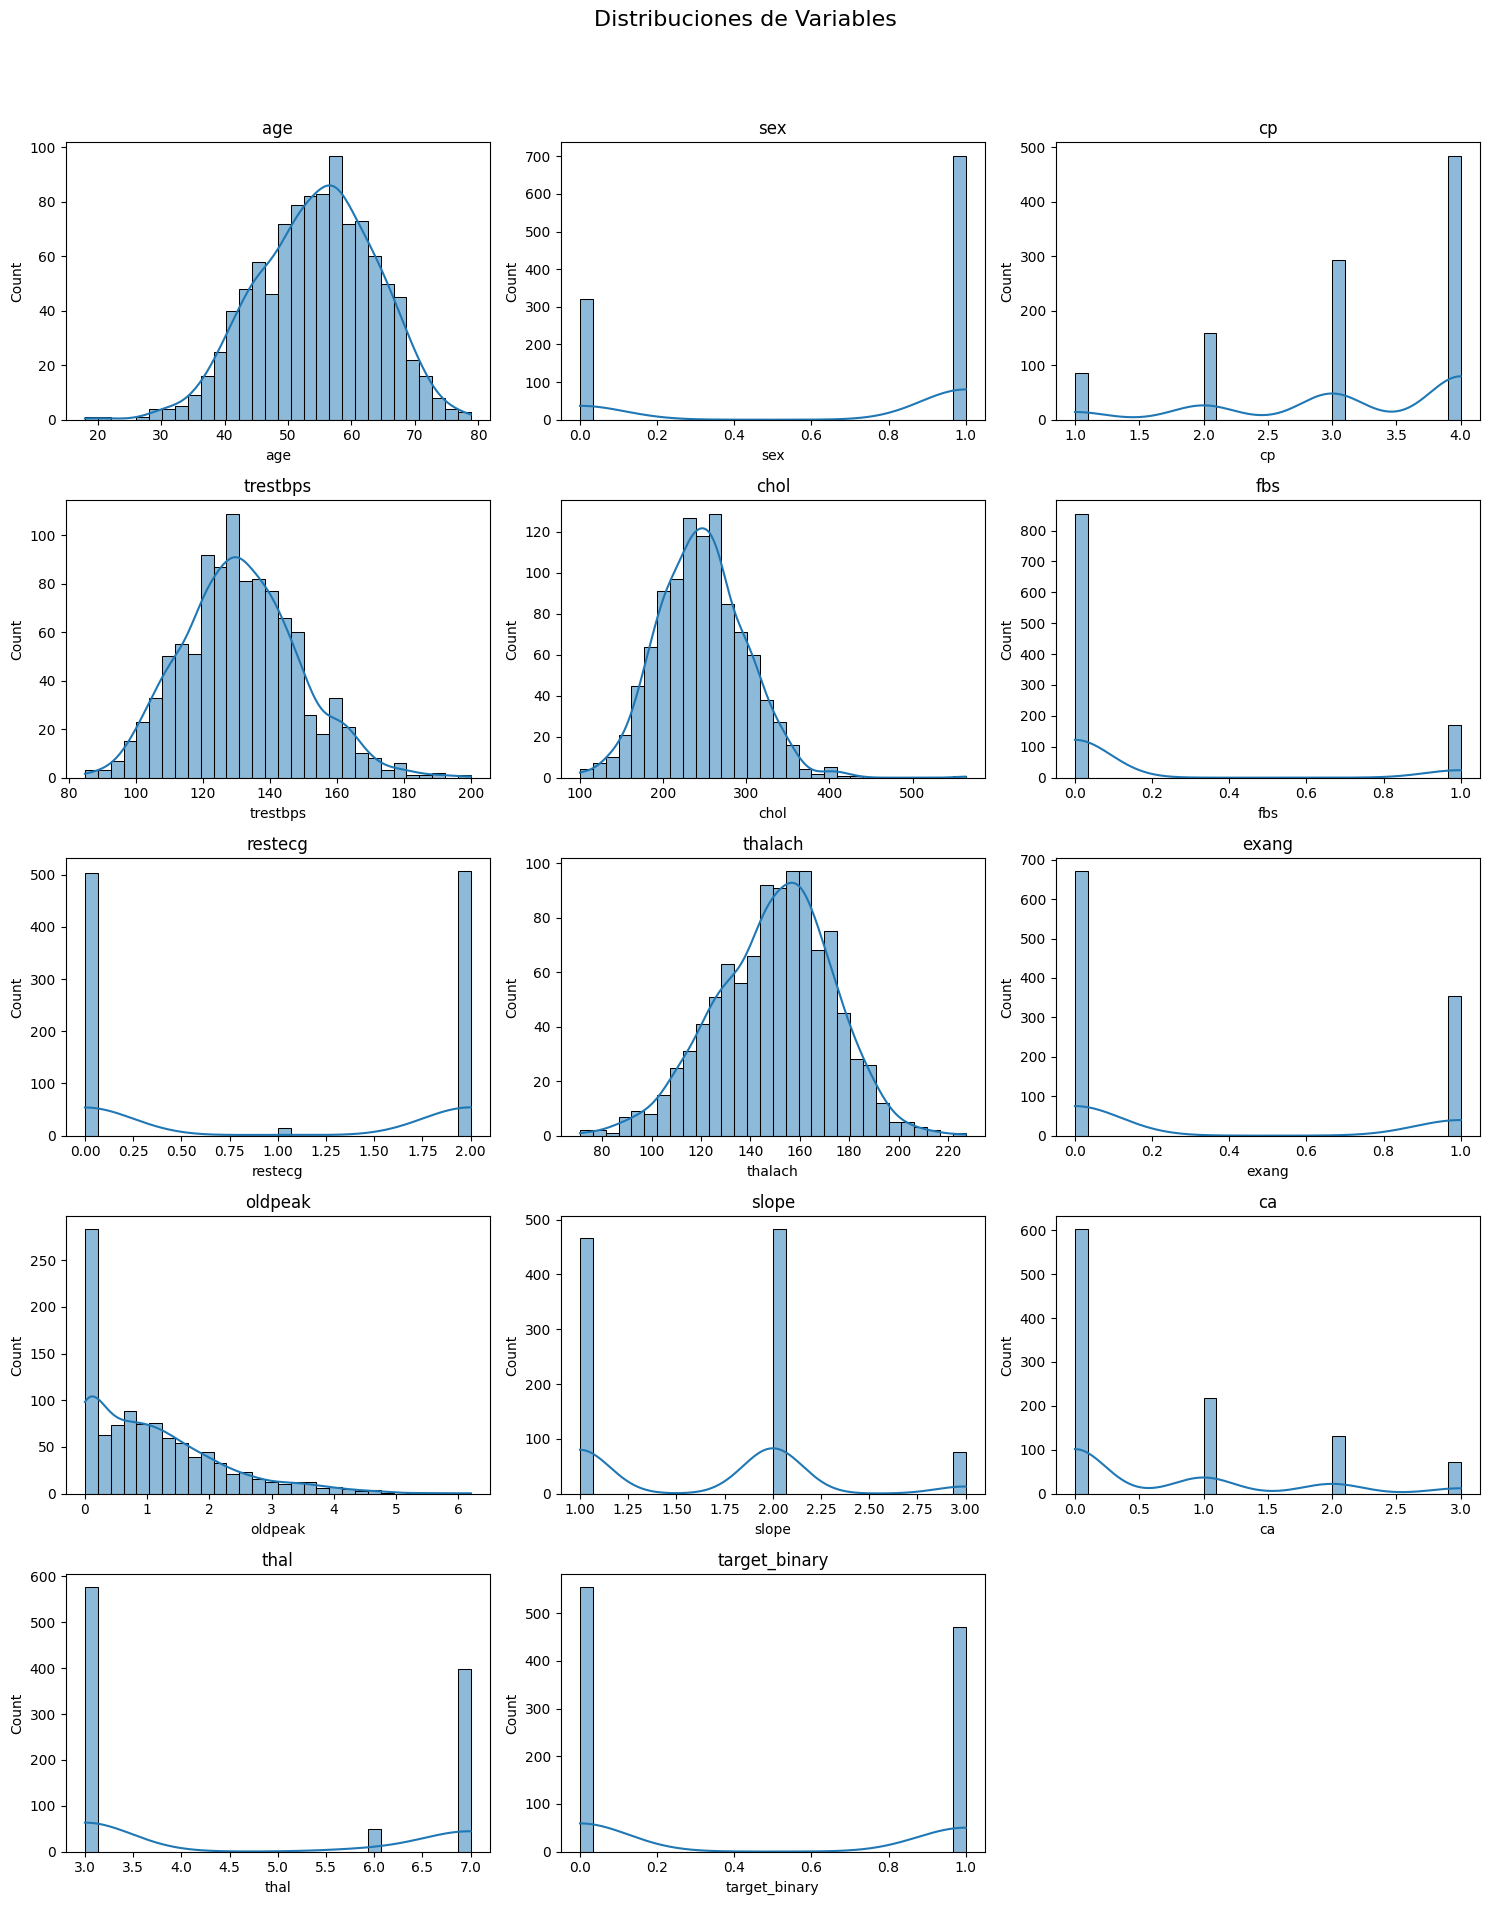

In [14]:
nxl='/content/heart_disease.xlsx'
XDB=pd.read_excel(nxl,sheet_name="heart_disease")

#Seleccionamos las variables de trabajo
variables = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target_binary']
XDB = XDB[variables]

XDB=XDB.dropna()

# Mostrar estadísticas descriptivas
print("\nEstadísticas descriptivas:\n", XDB.describe())

print("\n")

# Calcular número de filas y columnas necesarias para los subplots
n_vars = len(variables)
n_cols = 3
n_rows = math.ceil(n_vars / n_cols)

# Crear subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
fig.suptitle("Distribuciones de Variables", fontsize=16)

# Asegurar que axes sea iterable (en caso de que haya solo una fila)
axes = axes.flatten() if n_vars > 1 else [axes]

# Graficar cada variable
for i, var in enumerate(variables):
    sns.histplot(XDB[var], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(var)

# Eliminar subplots vacíos (si hay más espacios de los que se usan)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar diseño para que el título no se solape
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Modelo de Clasificación

Para la tarea de clasificación, se eligió un árbol de decisión debido a que la variable objetivo `target` representa la presencia o ausencia de enfermedad cardíaca, lo que convierte el problema en una clasificación binaria. Los árboles de decisión son modelos supervisados altamente interpretables, lo cual resulta especialmente valioso en contextos médicos, donde comprender cómo se toman las decisiones es tan importante como la precisión del modelo. Este tipo de modelo permite identificar qué características (como edad, tipo de dolor de pecho, colesterol, presión arterial, entre otras) tienen mayor peso en la predicción del diagnóstico. Además, los árboles de decisión no requieren que las variables numéricas estén normalizadas, ni que las relaciones entre variables sean lineales, lo que los hace muy adecuados para trabajar con datos clínicos heterogéneos como los del presente dataset. Su simplicidad, capacidad explicativa y efectividad en tareas de clasificación médica justifican plenamente su elección.

In [38]:
#Variables de entrada y salida
XD=np.array(XDB[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'slope', 'ca', 'thal']])
yd=np.array(XDB[['target_binary']])

### Árbol de Decisión

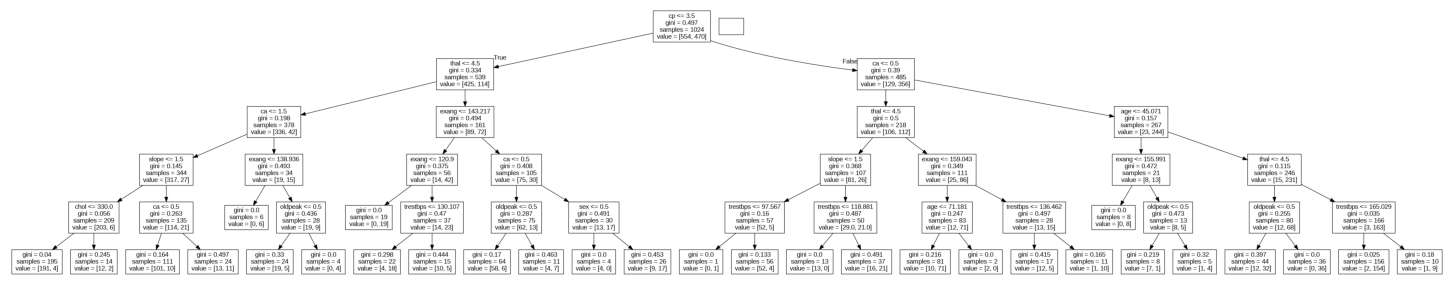

In [39]:
mar=DecisionTreeClassifier(criterion='gini',max_depth=5)
mar.fit(XD,yd)

vs=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'slope', 'ca', 'thal']

dot_data=export_graphviz(mar,feature_names=vs)
graph=graph_from_dot_data(dot_data)

graph.write_png('1. ArbolHeartDisease.png')
plt.figure(figsize=(18.5,18.5))
plt.imshow(plt.imread('1. ArbolHeartDisease.png'))
plt.axis('off')
plt.show()

### Desempeño

In [40]:
ydp=mar.predict(XD)  #Hazme el pronóstico de los enfermos y no enfermos.
cm=confusion_matrix(yd,ydp)
print(cm)

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]

Ex=((VN+VP)/(VN+VP+FN+FP))*100
print("La exactitud del modelo es del:",Ex)

TE=((FN+FP)/(VN+VP+FN+FP))*100
print("La tasa de error del modelo es del:",TE)

Sen=(VP/(VP+FN))*100
print("La sensibilidad del modelo es del:",Sen)

Esp=(VN/(VN+FP))*100
print("La especificidad del modelo es del:",Esp)

Pre=(VP/(VP+FP))*100
print("La precisión del modelo es del:",Pre)

Pren=(VN/(VN+FN))*100
print("La precisión negativa del modelo es del:",Pren)

[[494  60]
 [ 53 417]]
La exactitud del modelo es del: 88.96484375
La tasa de error del modelo es del: 11.03515625
La sensibilidad del modelo es del: 88.72340425531915
La especificidad del modelo es del: 89.16967509025271
La precisión del modelo es del: 87.42138364779875
La precisión negativa del modelo es del: 90.31078610603291


### Predicción Puntual

In [41]:
persona_nueva = np.array([[54, 1, 2, 140, 250, 0, 1, 160, 0, 2, 0, 2]])

# Predicción con Árbol de Decisión
pred_tree = mar.predict(persona_nueva)
prob_tree = mar.predict_proba(persona_nueva)

print("Predicción con Árbol de Decisión:", pred_tree[0])
print("Probabilidades de cada categoría con Árbol de Decisión:", prob_tree)

if pred_tree == 1:
  print("El modelo árbol de decisión predice que el paciente tiene enfermedad cardíaca")
else:
  print("El modelo árbol de decisión predice que el paciente no tiene enfermedad cardíaca")

Predicción con Árbol de Decisión: 0
Probabilidades de cada categoría con Árbol de Decisión: [[0.90990991 0.09009009]]
El modelo árbol de decisión predice que el paciente no tiene enfermedad cardíaca


## Modelo de Predicción

Como modelo de pronóstico se ha elegido MADALINE (Multiple Adaptive Linear Neuron), una red neuronal adaptativa compuesta por múltiples neuronas ADALINE que resulta adecuada para problemas de regresión, es decir, para predecir variables numéricas continuas. En este caso, se busca predecir la variable `oldpeak`, que representa la depresión del segmento ST inducida por ejercicio, un indicador clínico relevante para evaluar isquemia miocárdica y la respuesta del corazón al esfuerzo. `oldpeak` depende de diversos factores como la edad, el tipo de dolor de pecho, la presión arterial, el nivel de colesterol, la frecuencia cardíaca máxima (`thalach`), entre otros. Dado que estas relaciones pueden ser no lineales y complejas, MADALINE es una opción adecuada, ya que puede capturar patrones no lineales mediante el ajuste adaptativo de sus pesos. Además, al ser una red neuronal simple, su entrenamiento es eficiente y su estructura es lo suficientemente flexible como para adaptarse a la variabilidad de los datos clínicos. Esto permite generar pronósticos útiles sobre oldpeak, contribuyendo a una mejor comprensión y prevención de condiciones cardíacas bajo estrés físico.

### ¿Por qué oldpeak?

#### ¿Qué es `oldpeak`?

La variable **`oldpeak`** representa la **depresión del segmento ST inducida por el ejercicio**, medida en relación con el estado en reposo. Es una variable **numérica continua** que refleja la diferencia entre el nivel del segmento ST en un electrocardiograma (ECG) cuando el paciente está en ejercicio y cuando está en reposo.

---

#### Interpretación clínica

* El **segmento ST** es una parte del trazado del ECG que representa la fase en la que los ventrículos del corazón están despolarizados, es decir, después de que se contraen pero antes de que se relajen.
* Cuando el corazón está sometido a **estrés (como durante el ejercicio)**, es normal que cambien algunas características del ECG. Sin embargo, una **depresión anormal del ST** puede ser un **signo de isquemia**, es decir, que el músculo cardíaco no está recibiendo suficiente oxígeno.
* **`oldpeak` alto** (mayor depresión del ST) suele asociarse con mayor probabilidad de **problemas coronarios** como obstrucciones en las arterias.

---

#### Valores típicos y significado

| Valor de `oldpeak` | Interpretación clínica aproximada                    |
| ------------------ | ---------------------------------------------------- |
| 0.0                | Sin depresión del ST; respuesta normal al ejercicio. |
| 0.1 – 1.0          | Ligera depresión, puede ser normal o indicar alerta. |
| > 1.0              | Posible isquemia; requiere mayor evaluación clínica. |
| > 2.0              | Alta sospecha de enfermedad cardíaca                 |

---

#### En el contexto del modelo

Como variable de **pronóstico**, `oldpeak` es útil porque refleja cómo responde el corazón al ejercicio. Predecirla a partir de otras variables como edad, sexo, presión arterial o tipo de dolor de pecho permite anticipar posibles signos de **estrés cardíaco anormal**, lo cual es crucial para la detección temprana de enfermedad arterial coronaria.


### MADALINE

In [87]:
#Variables de entrada y salida
XD=np.array(XDB[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'slope', 'ca', 'thal']]); XDn=XD/np.max(XD,axis=0)
yd=np.array(XDB[['oldpeak']]); ydn=yd/np.max(yd,axis=0)
print("Los datos de entrada normalizados son:\n",XDn)

Los datos de entrada normalizados son:
 [[0.79954281 1.         0.25       ... 1.         0.         0.85714286]
 [0.85030743 1.         1.         ... 0.66666667 1.         0.42857143]
 [0.85030743 1.         1.         ... 0.66666667 0.66666667 1.        ]
 ...
 [0.72762045 1.         0.5        ... 0.33333333 0.         1.        ]
 [0.51883416 0.         1.         ... 0.66666667 0.33333333 1.        ]
 [0.59475029 1.         0.75       ... 0.66666667 0.66666667 0.42857143]]


In [76]:
NE=XDn.shape[1] #Número de entradas
madaline=tf.keras.models.Sequential() #capa 2: el núcleo o salida del modelo
madaline.add(tf.keras.layers.Dense(128, input_dim=NE, activation='relu'))
madaline.add(tf.keras.layers.Dense(64, activation='relu'))
madaline.add(tf.keras.layers.Dense(1, activation=None))  # Salida lineal
madaline.compile(optimizer='adam', loss='mse')

history_madaline = madaline.fit(XDn, ydn, epochs=300, verbose=0) #Recorrer 300 veces la tabla de datos
ydp=madaline.predict(XDn)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


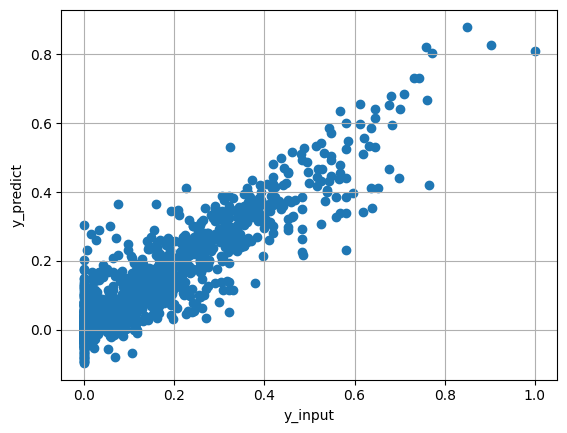

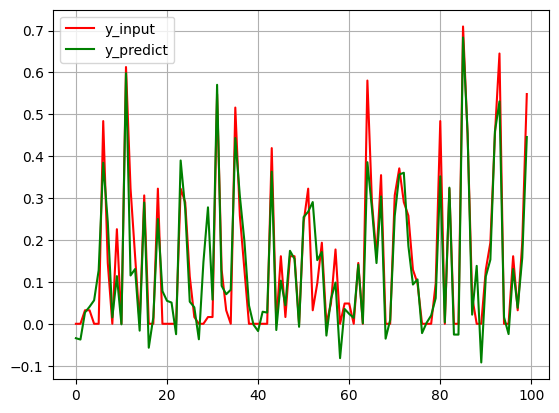

In [80]:
plt.figure()
plt.scatter(ydn,ydp)
plt.grid()
plt.xlabel('y_input')
plt.ylabel('y_predict')
plt.show()

plt.figure()
plt.plot(ydn[200:300,],color='red')
plt.plot(ydp[200:300,],color='green')
plt.legend(['y_input','y_predict'])
plt.grid()
plt.show()

### Correlación de los Datos y Comportamiento del Error

In [81]:
#Determinamos la correlación
df=pd.DataFrame(np.column_stack((ydn,ydp)))
print("La correlación de los datos es:\n",df.corr())

La correlación de los datos es:
           0         1
0  1.000000  0.899142
1  0.899142  1.000000


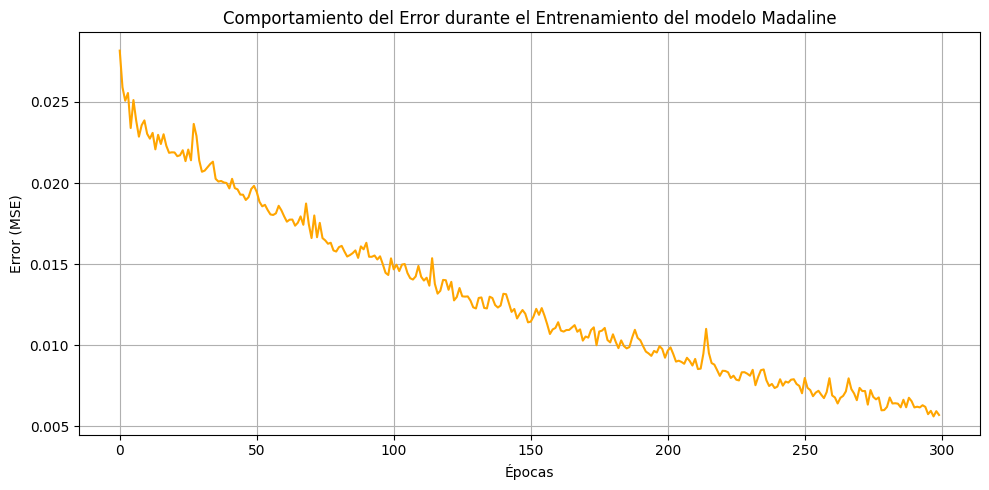

In [82]:
loss_madaline = history_madaline.history['loss']

plt.figure(figsize=(10,5))
plt.plot(loss_madaline, label='Madaline', color='orange')
plt.xlabel("Épocas")
plt.ylabel("Error (MSE)")
plt.title("Comportamiento del Error durante el Entrenamiento del modelo Madaline")
plt.grid(True)
plt.tight_layout()
plt.show()

In [89]:
print(f"Error (MSE) final: {loss_madaline[-1]:.4f}")

Error (MSE) final: 0.0057


### Efectos Combinados

In [84]:
# Extraer pesos
W1 = madaline.layers[0].get_weights()[0]  # shape: (12,128)
W2 = madaline.layers[1].get_weights()[0]  # shape: (128,64)
W3 = madaline.layers[2].get_weights()[0]  # shape: (64,1)

# Aproximación del efecto combinado
efectos = np.dot(W1, W2)  # shape: (12,64)
efectos = np.dot(efectos, W3).flatten()  # shape: (12,)

# Nombres de las variables
nombres_variables = [
    'age',
    'sex',
    'cp',
    'trestbps',
    'chol',
    'fbs',
    'restecg',
    'thalach',
    'exang',
    'slope',
    'ca',
    'thal'
]

# Mostrar los efectos
for nombre, efecto in zip(nombres_variables, efectos):
    signo = "positivo" if efecto > 0 else ("negativo" if efecto < 0 else "nulo")
    print(f"{nombre:15}: efecto combinado = {efecto:.4f} → {signo}")

age            : efecto combinado = -1.8000 → negativo
sex            : efecto combinado = -2.1900 → negativo
cp             : efecto combinado = -4.9543 → negativo
trestbps       : efecto combinado = 0.6518 → positivo
chol           : efecto combinado = 0.0199 → positivo
fbs            : efecto combinado = -2.1537 → negativo
restecg        : efecto combinado = -1.6071 → negativo
thalach        : efecto combinado = -1.1519 → negativo
exang          : efecto combinado = 5.5916 → positivo
slope          : efecto combinado = -0.8750 → negativo
ca             : efecto combinado = -1.1506 → negativo
thal           : efecto combinado = 2.5117 → positivo


### Pronóstico Puntual

In [86]:
#Evaluar un nuevo paciente
Xsc=[[54, 1, 2, 140, 250, 0, 1, 160, 0, 2, 0, 2]]; Xscn=Xsc/np.max(XD,axis=0)
ydpsc=madaline.predict(Xscn)
print("El oldpeak estimado es:\n",ydpsc*np.max(yd,axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
El oldpeak estimado es:
 [[1.8297769]]


## Análisis de Resultados

En este proyecto se desarrollaron dos enfoques complementarios para analizar un conjunto de datos clínicos sobre enfermedades cardíacas: un modelo de clasificación basado en árboles de decisión y un modelo de pronóstico basado en redes neuronales MADALINE. Ambos modelos buscan apoyar la toma de decisiones clínicas desde distintas perspectivas: diagnóstico y estimación cuantitativa.

### Modelo de Clasificación: Árbol de Decisión

El modelo de árbol de decisión se aplicó para predecir la variable `target`, que indica la presencia (1) o ausencia (0) de enfermedad cardíaca. Este enfoque fue elegido por su interpretabilidad, bajo costo computacional y facilidad de visualización, lo cual es clave en contextos médicos donde se requiere comprender cómo se llega a una decisión.

El modelo alcanzó un desempeño sobresaliente con las siguientes métricas:

*   Exactitud (Accuracy): 88.96%
*   Sensibilidad (Recall para la clase positiva): 88.72%
*   Especificidad (Recall para la clase negativa): 89.17%
*   Precisión positiva: 87.42%
*   Precisión negativa: 90.31%

Estas cifras reflejan un excelente equilibrio en la capacidad del modelo para identificar correctamente tanto a pacientes con enfermedad como a aquellos sin ella. La sensibilidad y especificidad elevadas son especialmente importantes en medicina, donde es crítico minimizar tanto los falsos negativos como los falsos positivos.

Además, el análisis del árbol permitió identificar las variables más relevantes para la clasificación, tales como:

*   `cp` (tipo de dolor de pecho)
*   `thalach` (frecuencia cardíaca máxima alcanzada)
*   `ca` (número de vasos coloreados por fluoroscopía)
*   y `slope` (pendiente del segmento ST)

El modelo reveló reglas claras de decisión, como por ejemplo: si el paciente presenta cierto tipo de dolor torácico y una frecuencia cardíaca máxima baja, existe una alta probabilidad de que tenga enfermedad cardíaca. Esto hace del árbol no solo una herramienta predictiva eficaz, sino también una guía comprensible para el razonamiento clínico.











### Modelo de Pronóstico: Red Neuronal MADALINE

Para el pronóstico de la variable continua `oldpeak`, se implementó una red neuronal tipo MADALINE entrenada con el optimizador Adam y la función de pérdida MSE. Al finalizar el entrenamiento, se alcanzó un error cuadrático medio (MSE) de 0.0057, lo que indica un nivel muy bajo de error en la predicción.

Además del MSE, se calculó la correlación entre los valores reales (`ydn`) y predichos (`ydp`), obteniendo un valor de 0.8991, lo cual refleja una fuerte asociación lineal positiva. Esta correlación confirma que el modelo no solo produce valores cercanos a los reales, sino que también sigue correctamente la tendencia de la variable oldpeak, algo fundamental en tareas de regresión.

#### **Análisis de Efectos Combinados**

El análisis de los efectos combinados de las variables de entrada sobre la predicción de `oldpeak` permitió identificar **cuáles factores influyen más** en el comportamiento del modelo y en qué dirección. La variable con mayor impacto positivo fue **`exang`** (angina inducida por ejercicio), lo cual es coherente clínicamente, ya que este síntoma suele asociarse con mayor depresión del segmento ST. También mostraron efectos positivos **`thal`** (estado funcional del corazón) y **`trestbps`** (presión arterial en reposo), aunque con menor intensidad.

Por otro lado, varias variables presentaron efectos negativos, destacándose **`cp`** (tipo de dolor torácico), **`sex`**, y **`fbs`** (glucemia en ayunas). En particular, **`thalach`** (frecuencia cardíaca máxima alcanzada) tuvo un efecto negativo, lo que sugiere que una mejor capacidad funcional se asocia con menores niveles de `oldpeak`.

### Conclusión

Ambos modelos aportaron valor significativo: el árbol de decisión permitió realizar diagnósticos precisos y comprensibles sobre la presencia de enfermedad cardíaca, mientras que la red neuronal MADALINE fue efectiva en la estimación de una variable clave (oldpeak), con bajo error y fuerte correlación. La integración de métricas cuantitativas y análisis interpretativos como los efectos combinados permite no solo predecir, sino también comprender las dinámicas clínicas subyacentes, haciendo que estas herramientas sean aplicables a contextos reales de toma de decisiones médicas.